## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [2]:
from sklearn import datasets
from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [3]:
wine = datasets.load_wine()  # 0,1,2 multi-class
boston = datasets.load_boston()  # 連續型
breast_cancer = datasets.load_breast_cancer() # 0,1

OLS 線性迴歸

In [40]:
# boston用最小平方法
print(boston.data.shape)
#先只取一個 X
x_train, x_test, y_train, y_test = train_test_split(
    boston.data[:,5,np.newaxis],boston.target,test_size=0.1,random_state=2)

(506, 13)


In [41]:
# 訓練
ols = linear_model.LinearRegression().fit(x_train,y_train)
# test預測
ols_pred = ols.predict(x_test)
ols.coef_ #beta數字

array([9.12231938])

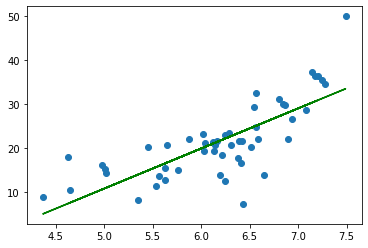

In [42]:
# 畫圖看配適狀況
plt.scatter(x_test,y_test)
plt.plot(x_test,ols_pred,color='green')

In [45]:
#算OLS的MSE及R-square
print('MSE: %.3f' %mean_squared_error(y_test,ols_pred))
print('R-square: %.3f' %r2_score(y_test,ols_pred))

MSE: 31.541
R-square: 0.572


Logistic regression

In [49]:
#breast_cancer (二元)用logistic
x_train, x_test, y_train, y_test = train_test_split(
    breast_cancer.data,breast_cancer.target,test_size=0.1,random_state=2)
#訓練 損失函數優化法先選liblinear,ovr為二元迴歸
lg_2 = linear_model.LogisticRegression(solver='liblinear',multi_class='ovr').fit(x_train,y_train)

In [52]:
#預測
lg_2_pred = lg_2.predict(x_test)

lg_2.coef_ #beta

array([[ 2.05261011,  0.13733154, -0.06634684, -0.00370715, -0.16185378,
        -0.40501305, -0.63887841, -0.34522975, -0.22468544, -0.0277382 ,
        -0.02855378,  1.10902969,  0.03772045, -0.09469436, -0.01741343,
         0.00705175, -0.0497131 , -0.04023755, -0.04007121,  0.00626172,
         1.24408881, -0.3357842 , -0.12377785, -0.02293554, -0.29796921,
        -1.13305882, -1.5686779 , -0.6553054 , -0.66264966, -0.11547732]])

In [53]:
#算Logistic 的MSE及
print('MSE: %.3f' %mean_squared_error(y_test,lg_2_pred))
print('Accuracy: %.3f' %r2_score(y_test,lg_2_pred))

MSE: 0.018
Accuracy: 0.919


In [58]:
#預測結果
lg_2_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

Logistic regression 多元

In [66]:
#wine (多元)用logistic 多元 (0,1,2)
x_train, x_test, y_train, y_test = train_test_split(
    wine.data,wine.target,test_size=0.1,random_state=2)
#訓練 損失函數優化法先選newton-cg,multinomial為多元迴歸
# (liblinear 不能用在multi)
lg_more = linear_model.LogisticRegression(solver='newton-cg',multi_class='multinomial').fit(x_train,y_train)

#預測
lg_more_pred = lg_more.predict(x_test)

lg_more.coef_ #beta

array([[ 5.46670100e-01,  5.31284189e-01,  4.34998955e-01,
        -3.08937091e-01, -2.30250049e-02,  3.21474165e-01,
         7.67762045e-01,  6.67487454e-03,  7.61892226e-02,
         2.64997784e-01,  1.30067635e-02,  5.94530613e-01,
         9.85153031e-03],
       [-7.02625827e-01, -8.23577684e-01, -6.31490016e-01,
         1.60118180e-01, -1.54778344e-02,  1.11018872e-01,
         4.34028216e-01,  1.01638227e-01,  3.93978034e-01,
        -1.09137392e+00,  3.03436697e-01,  5.72015211e-02,
        -9.30453866e-03],
       [ 1.55955726e-01,  2.92293495e-01,  1.96491061e-01,
         1.48818911e-01,  3.85028393e-02, -4.32493037e-01,
        -1.20179026e+00, -1.08313102e-01, -4.70167257e-01,
         8.26376140e-01, -3.16443460e-01, -6.51732134e-01,
        -5.46991630e-04]])

In [67]:
#算Logistic 的MSE及
print('MSE: %.3f' %mean_squared_error(y_test,lg_more_pred))
print('Accuracy: %.3f' %r2_score(y_test,lg_more_pred))

MSE: 0.056
Accuracy: 0.917


In [68]:
#預測結果
lg_more_pred

array([0, 0, 2, 1, 0, 0, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 0, 0])